In [0]:
import pandas as pd

In [0]:
tweets_data = pd.read_csv('sentimentdata.csv')

In [3]:
tweets_data.head()

,text,English
0,- ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½182ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,- ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½182ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...
1,""" DAIHATSU SIRION "" #KuisDaihatsu #DaihatsuSah...","""Daihatsu Sirion"" Susi Armanih #DaihatsuSahaba..."
2,""" SATRIA "" #SuzukiQuiz Kuy ikutan gaes di Suzu...","""SATRIA"" Kuy #SuzukiQuiz follow gaes in Suzuki..."
3,""" SATRIA "" #SuzukiQuiz Berjalan ke atas rotan ...","""SATRIA"" #SuzukiQuiz Walk up the cane to dry h..."
4,""" SATRIA "" #SuzuqiQuiz #satria Armanih","""SATRIA"" #satria #SuzuqiQuiz Armanih"


In [4]:
print(len(tweets_data))

13532


In [5]:
tweets_data.dropna(axis = 0, how = "any", inplace = True)
tweets_data.isnull().sum()

text       0
English    0
dtype: int64

In [6]:
print (len(tweets_data))

13532


In [0]:
tweets_data.drop_duplicates(inplace=True)

In [8]:
print (len(tweets_data))

11468


In [9]:
import re
def word_in_text(word, English):
    try:
        English = English.lower()
        match = re.search(word, English)
        if match:
            return True
        return False
    except AttributeError:
        return False
print(word_in_text('hello','Hi there maybe, I would say hello instead'))

True


In [10]:
from textblob import TextBlob
# Sample of using TextBlob sentiment
print (TextBlob("This food is good").polarity)
print (TextBlob("This food is bad").polarity)
print (TextBlob("This food is very good").polarity)
print (TextBlob("This food is very bad").polarity)
print (TextBlob("This food is not very good").polarity)
print (TextBlob("This food is very not good").polarity)

0.7
-0.6999999999999998
0.9099999999999999
-0.9099999999999998
-0.26923076923076916
-0.07499999999999998


In [11]:
type(tweets_data['English'])

pandas.core.series.Series

In [0]:
# Importing TextBlob from textblob to find polarity
from textblob import TextBlob

def find_polarity(tweet):
    try:
        textblob_tweet = TextBlob(tweet)
        return textblob_tweet.polarity
    except:
        pass
    
def find_subjectivity(tweet):
    try:
        textblob_tweet = TextBlob(tweet)
        return textblob_tweet.subjectivity
    except:
        pass

In [13]:
# Applying textblob to each tweets text
tweets_data['polarity'] = tweets_data['English'].apply(lambda tweet:find_polarity(tweet))
tweets_data['subjectivity'] = tweets_data['English'].apply(lambda tweet:find_subjectivity(tweet))
tweets_data.head()

,text,English,polarity,subjectivity
0,- ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½182ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,- ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½182ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...,0.000000,0.000000
1,""" DAIHATSU SIRION "" #KuisDaihatsu #DaihatsuSah...","""Daihatsu Sirion"" Susi Armanih #DaihatsuSahaba...",0.000000,0.000000
2,""" SATRIA "" #SuzukiQuiz Kuy ikutan gaes di Suzu...","""SATRIA"" Kuy #SuzukiQuiz follow gaes in Suzuki...",0.000000,0.000000
3,""" SATRIA "" #SuzukiQuiz Berjalan ke atas rotan ...","""SATRIA"" #SuzukiQuiz Walk up the cane to dry h...",0.255556,0.677778
4,""" SATRIA "" #SuzuqiQuiz #satria Armanih","""SATRIA"" #satria #SuzuqiQuiz Armanih",0.000000,0.000000


In [14]:
# Let's do a check on polarity texts
tweets_data.sort_values('polarity',ascending=True).head()

,text,English,polarity,subjectivity
11619,Semoga segera punya mobil impian sprti ini ï¿½...,Hopefully soon have this bleak dream car ï¿½ï¿...,-1.0,1.0
6433,Indent terlalu cepet2 sampe2 boring nungguinny...,Indent too cepet2 sampe2 nungguinnya1 boring! ...,-1.0,1.0
333,. Yang lain holide Kita mah mlipir siapa tau a...,", The others Holide We mah mlipir who know som...",-1.0,1.0
3417,Any car but not Maruti Suzuki India .....They ...,Any car but not Maruti Suzuki India ..... They...,-1.0,1.0
6409,Imbank Prasodjo jan sangar yamha klo bikin ko ...,Prasodjo Imbank Yamha Klo make grim jan ko san...,-1.0,1.0


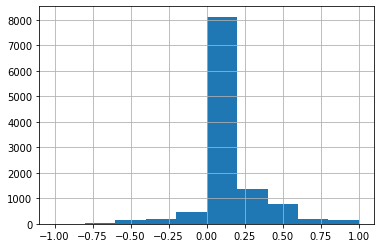

In [15]:
tweets_data.polarity.hist()

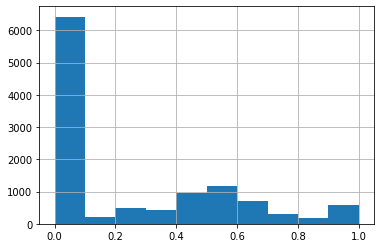

In [16]:
tweets_data.subjectivity.hist()

In [0]:
# Determining if they a comment is satisfied or not satisfied (split by range)
tweets_data['polaritytext'] =  pd.cut(tweets_data.polarity, 3,labels=["unhappy","neutral","happy"])
tweets_data['subjectivitytext'] =  pd.cut(tweets_data.subjectivity, 2,labels=["meaningful","subjective"])

In [18]:
# Let's do a check on polarity texts
tweets_data.sort_values('polaritytext',ascending=False).head()

,text,English,polarity,subjectivity,polaritytext,subjectivitytext
11829,Siti Partima makasih kesayangan colekan nya ðŸ˜˜,Siti Partima pokes his favorite thanks ðŸ,0.350000,0.600000,happy,subjective
2277,@yamahaindonesia Horeeeee berhasil melewati ja...,@yamahaindonesia Horeeeee successfully passed ...,0.475000,0.625000,happy,subjective
2256,"@yamahaindonesia Folow, like Done ï¿½ï¿½ï¿½ï¿½...","@yamahaindonesia folow, like Done ï¿½ï¿½ï¿½ï¿½...",0.700000,0.600000,happy,subjective
2260,"@yamahaindonesia Gak bisa milih akuuuu, semuan...","Gak @yamahaindonesia can choose meeeee, becaus...",0.341667,0.658333,happy,subjective
5345,Go...go...go...Suzuki Baleno Hatchback (Semaki...,Go ... go ... go ... Suzuki Baleno Hatchback (...,0.347656,0.400000,happy,meaningful


In [19]:
#Summary of the dataset
tweets_data.describe()

,polarity,subjectivity
count,11468.000000,11468.000000
mean,0.095406,0.240618
std,0.218738,0.308969
min,-1.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.178571,0.500000
max,1.000000,1.000000


In [20]:
tweets_data['polaritytext'].value_counts()

neutral    9605
happy      1670
unhappy     193
Name: polaritytext, dtype: int64

#Model

In [0]:
#Load the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [22]:
train_reviews=tweets_data.English[:8028]
train_sentiments=tweets_data.polaritytext[:8028]
test_reviews=tweets_data.English[8028:]
test_sentiments=tweets_data.polaritytext[8028:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(8028,) (8028,)
(3440,) (3440,)


In [0]:
#Tokenization of text
tokenizer=ToktokTokenizer()

In [24]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
tweets_data['text']=tweets_data['text'].apply(denoise_text)
tweets_data['English']=tweets_data['English'].apply(denoise_text)

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://bit.ly/Budi-KONVEKSI" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://carimobil.id/mitsubishi/gorontalo" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning

In [0]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
tweets_data['text']=tweets_data['text'].apply(remove_special_characters)
tweets_data['English']=tweets_data['English'].apply(remove_special_characters)

In [0]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
tweets_data['text']=tweets_data['text'].apply(simple_stemmer)
tweets_data['English']=tweets_data['English'].apply(simple_stemmer)

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stopword_list=nltk.corpus.stopwords.words('english')

In [29]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
tweets_data['English']=tweets_data['English'].apply(remove_stopwords)

{'he', 'haven', 'hasn', 'its', "wasn't", 'there', 'such', 'up', 'so', 's', "won't", 'until', 'if', 'weren', "doesn't", 'more', 'then', 't', 'and', 'just', 'shouldn', 'than', 'don', 'yours', 'her', 'down', 'ma', 'me', 'll', 'too', 'on', 'this', 'before', 'where', 'for', 'how', 'i', "that'll", 'my', 'their', 'these', 'have', 'themselves', 'at', 'shan', 'yourself', 'whom', 'that', 'being', 'am', 'out', 'most', 'your', "wouldn't", 'off', 'should', 'all', 'mightn', 'will', "didn't", "mustn't", 'between', 'below', 'needn', "shouldn't", 'over', 'each', 'an', 'hers', 'we', 'against', 'they', 'ours', 'having', 'about', 'now', "shan't", 'myself', 'nor', 'was', 'above', "she's", 'under', 'did', 'here', 'y', 'won', 'not', "it's", 'mustn', "needn't", 're', 'further', 'been', 'were', 'doing', 'hadn', 'any', "you've", 'd', 'him', 'are', 'them', 'with', 'herself', 'who', "haven't", 'doesn', 'those', 'to', 'she', 'only', 'itself', "should've", 'after', 'had', "you'll", 'into', 'wasn', 'why', "you're", 

In [30]:
norm_train_reviews=tweets_data.English[:8028]
print(len(norm_train_reviews))

8028


In [31]:
norm_test_reviews=tweets_data.English[8028:]
print(len(norm_test_reviews))

3440


#Bag Of Words

In [32]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (8028, 128621)
BOW_cv_test: (3440, 128621)


#Term Frequency-Inverse Document Frequency model (TFIDF)

In [33]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (8028, 128621)
Tfidf_test: (3440, 128621)


#Labeling the sentiment text

In [0]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(tweets_data['polaritytext'])

In [35]:
print(len(train_sentiments))
print(len(test_sentiments))

8028
3440


In [0]:
from collections import Counter

#Logistic Regression

In [36]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [55]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(Counter(lr_bow_predict))
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(Counter(lr_tfidf_predict))

Counter({'neutral': 3394, 'happy': 39, 'unhappy': 7})
Counter({'neutral': 3440})


In [38]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.8244186046511628
lr_tfidf_score : 0.8180232558139535


#Stochastic gradient descent or Linear support vector machines (SVM) for bag of words and tfidf features

In [39]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments)
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments)
print(svm_tfidf)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=500, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [54]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(Counter(svm_bow_predict))
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(Counter(svm_tfidf_predict))

Counter({'neutral': 3360, 'happy': 71, 'unhappy': 9})
Counter({'neutral': 3410, 'happy': 27, 'unhappy': 3})


In [41]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.8244186046511628
svm_tfidf_score : 0.8226744186046512


#Multinomial Naive Bayes for bag of words and tfidf features

In [42]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [56]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(Counter(mnb_bow_predict))
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(Counter(mnb_tfidf_predict))

Counter({'neutral': 3381, 'happy': 48, 'unhappy': 11})
Counter({'neutral': 3437, 'happy': 3})


In [44]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.8241279069767442
mnb_tfidf_score : 0.8183139534883721
